In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

cleaned_data = pd.read_csv("cleaned_unscaled_data.csv")
# Ensure your dataset has columns: 'loan_amnt', 'person_income', 'loan_status', 'loan_int_rate', 'defaulted', 'max_loan_limit'


In [3]:
cleaned_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_encoded,cb_person_default_on_file_encoded,loan_grade_encoded,loan_intent_encoded
0,22,59000,5.0,35000,16.02,1,0.59,3,3,1,3,4
1,21,9600,5.0,1000,11.14,0,0.10,2,2,0,1,1
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,2,3
3,23,65500,4.0,35000,15.23,1,0.53,2,3,0,2,3
4,24,54400,8.0,35000,14.27,1,0.55,4,3,1,2,3


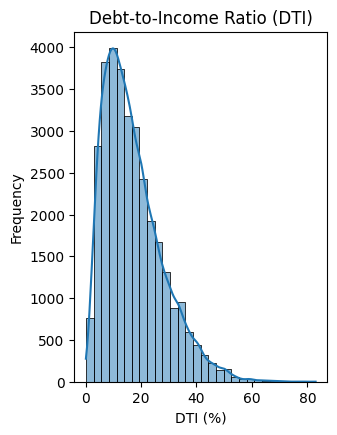

In [4]:
warnings.filterwarnings('ignore')

def compute_dti(df):
    df['DTI'] = (df['loan_amnt'] / df['person_income']) * 100

compute_dti(cleaned_data)

plt.figure(figsize=(15, 10))

# Debt-to-Income Ratio
plt.subplot(2, 4, 1)
sns.histplot(cleaned_data['DTI'], bins=30, kde=True)
plt.title('Debt-to-Income Ratio (DTI)')

#plt.legend()
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')

plt.show()  

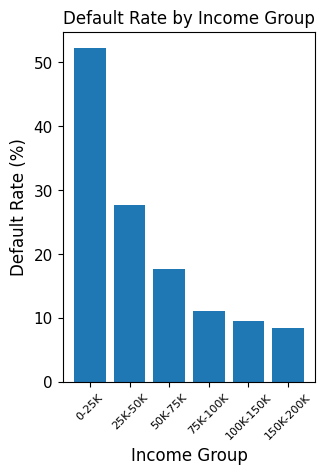

In [15]:
# Function to compute default rate per group
def compute_default_rate(df):
    df['Default_Rate'] = (df['loan_status'].sum() / len(df)) * 100

# Apply the function to the dataset
compute_default_rate(cleaned_data)

# Create income groups by binning 'person_income'
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000]
income_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '150K-200K']
cleaned_data['income_group'] = pd.cut(cleaned_data['person_income'], bins=income_bins, labels=income_labels)

# Compute default rate by income group
income_group_default_rate = cleaned_data.groupby('income_group')['loan_status'].mean() * 100

# Plot the default rate distribution by income group
plt.figure(figsize=(15, 10))

# Bar graph for default rate over different income groups
plt.subplot(2, 4, 2)
plt.bar(income_group_default_rate.index, income_group_default_rate)
plt.title('Default Rate by Income Group')
plt.xlabel('Income Group', fontsize=12)  # Smaller x-label font size
plt.ylabel('Default Rate (%)', fontsize=12)  # Smaller y-label font size

# Adjust the x-tick labels font size
plt.xticks(fontsize=8, rotation=45)  # Rotate labels by 45 degrees
plt.yticks(fontsize=11)

plt.show()

This serves as a risk management KPI for lenders. By tracking default rates within different income brackets, a financial institution can assess how income levels affect the likelihood of default.

It helps in adjusting lending policies or approval criteria to mitigate risk. For example, if a particular income group consistently shows high default rates, the institution might increase scrutiny on credit approvals for that group or credit loan terms.

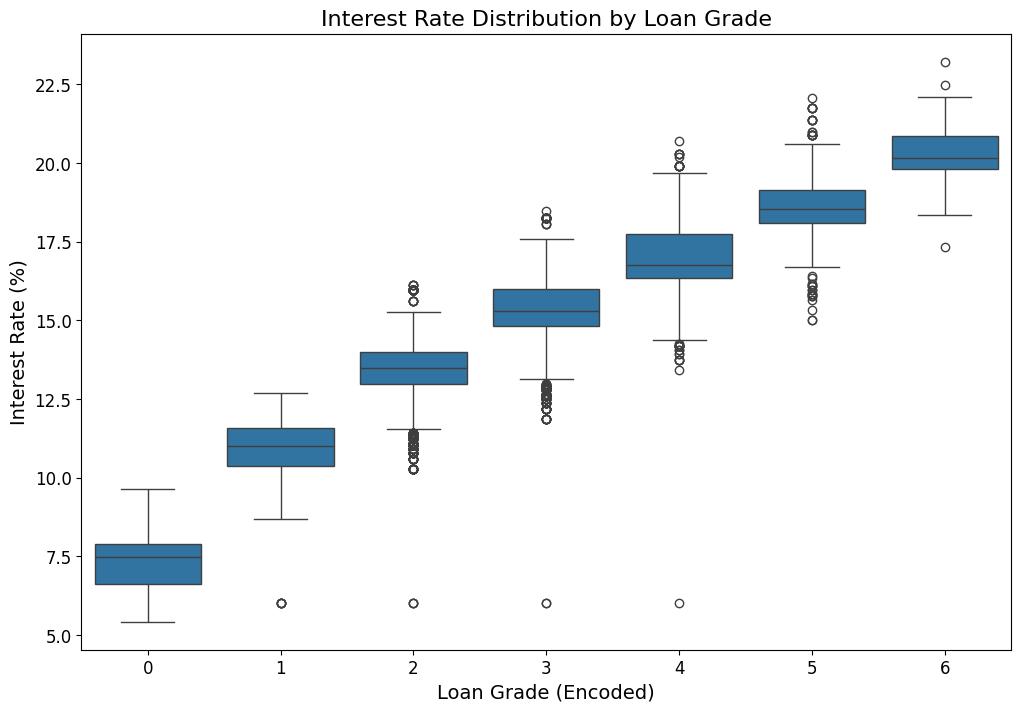

In [23]:
# Function to compute the overall average interest rate (for reference)
def compute_avg_interest_rate(df):
    df['Average_Interest_Rate'] = df['loan_int_rate'].mean()

# Apply the function to the dataset
compute_avg_interest_rate(cleaned_data)

# Set the figure size larger for better readability
plt.figure(figsize=(12, 8))

# Create a box plot of interest rates across different loan grades
sns.boxplot(x='loan_grade_encoded', y='loan_int_rate', data=cleaned_data)
plt.title('Interest Rate Distribution by Loan Grade', fontsize=16)  # Larger title font size
plt.xlabel('Loan Grade', fontsize=14)  # Larger x-label font size
plt.ylabel('Interest Rate (%)', fontsize=14)  # Larger y-label font size

# Adjust the font size and label rotation for better readability
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

plt.show()



Tracking Interest Rate by Credit Grade is crucial for a credit card institution to ensure risk-based pricing, where high-risk customers are charged higher rates, protecting profitability. It helps maintain competitive positioning by offering fair rates to low-risk customers, enhancing customer retention. Additionally, it ensures regulatory compliance, avoiding potential legal issues related to unfair or predatory lending practices.

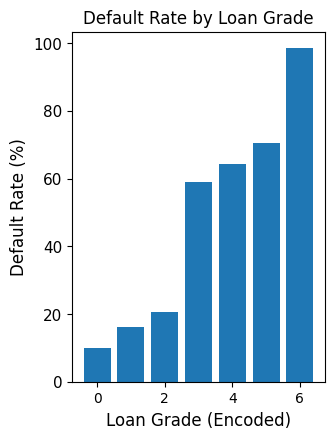

In [24]:
# Function to compute default rate per group
def compute_default_rate(df):
    df['Default_Rate'] = (df['loan_status'].sum() / len(df)) * 100

# Apply the function to the dataset
compute_default_rate(cleaned_data)

# Compute default rate by loan grade
loan_grade_default_rate = cleaned_data.groupby('loan_grade_encoded')['loan_status'].mean() * 100

# Plot the default rate distribution by loan grade
plt.figure(figsize=(15, 10))

# Bar graph for default rate over different loan grades
plt.subplot(2, 4, 3)
plt.bar(loan_grade_default_rate.index, loan_grade_default_rate)
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade (Encoded)', fontsize=12)  # Smaller x-label font size
plt.ylabel('Default Rate (%)', fontsize=12)  # Smaller y-label font size

# Adjust the x-tick labels font size
plt.xticks(fontsize=10, rotation=0)  # Keep labels horizontal
plt.yticks(fontsize=11)

plt.show()


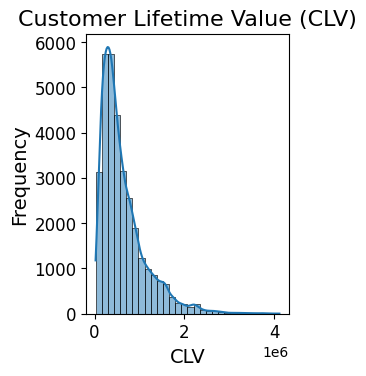

In [26]:
avg_loan_duration = cleaned_data['cb_person_cred_hist_length'].mean()  # Example using credit history length as loan duration

def compute_clv(df, avg_loan_duration):
    df['CLV'] = df['loan_amnt'] * df['loan_int_rate'] * avg_loan_duration

# Apply the function to compute CLV
compute_clv(cleaned_data, avg_loan_duration)

# Make the graph bigger
plt.figure(figsize=(12, 8))

# Customer Lifetime Value (CLV) Histogram
plt.subplot(2, 4, 5)
sns.histplot(cleaned_data['CLV'], bins=30, kde=True)
plt.title('Customer Lifetime Value (CLV)', fontsize=16)  # Larger title font
plt.xlabel('CLV', fontsize=14)  # Larger x-label font
plt.ylabel('Frequency', fontsize=14)  # Larger y-label font

# Adjust the font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Customer Lifetime Value (CLV) is a critical KPI for credit card institutions as it measures the total revenue a customer is expected to generate over their relationship with the company. CLV helps institutions identify their most profitable customers, optimize marketing spend, and tailor retention strategies to maximize value. It also aids in assessing the long-term profitability of different customer segments, ensuring resources are allocated efficiently to retain high-value customers and improve overall financial performance.

The x-axis in the graph represents the Customer Lifetime Value (CLV), ranging from low to high as you move from left to right. A higher CLV indicates a more valuable customer, as they generate more revenue over their entire relationship with the company. This helps credit card institutions focus on retaining high-CLV customers to maximize long-term profitability. Customer lifetime value is the total worth to a business of a customer over the whole period of their relationship with the brand.

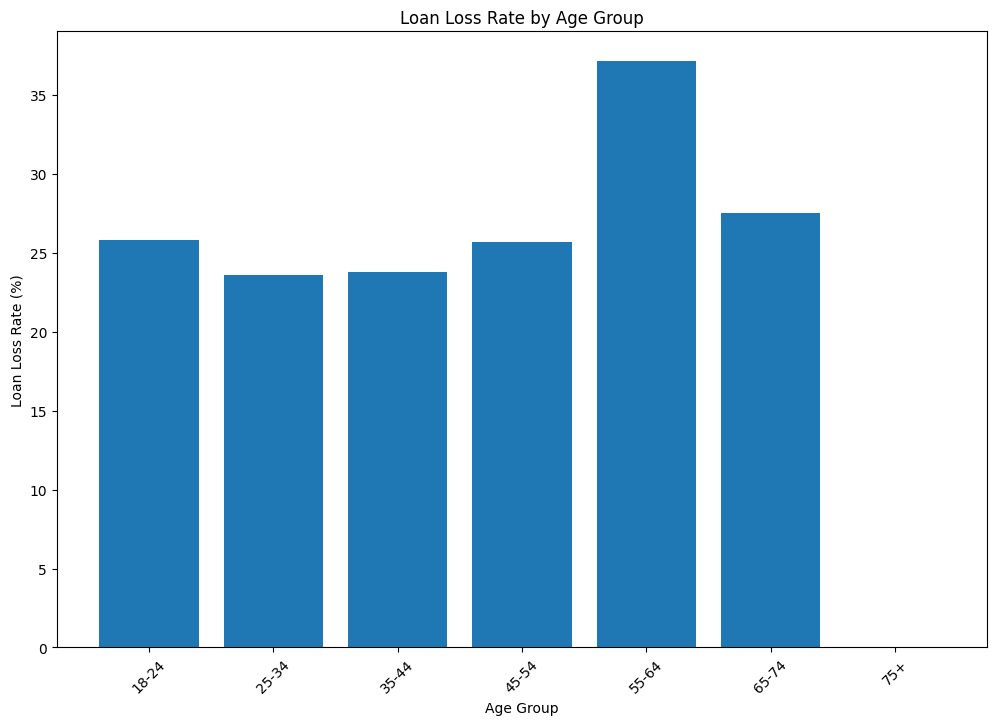

In [27]:
# Function to compute loan loss rate per age group
def compute_loan_loss_rate_by_age_group(df):
    # Create age bins (you can adjust the bin ranges as per your data)
    age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
    age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
    
    # Add a column for age group
    df['age_group'] = pd.cut(df['person_age'], bins=age_bins, labels=age_labels)

    # Calculate the loan loss rate for each age group
    loan_loss_rate_by_age_group = (
        df[df['loan_status'] == 1]  # Filter for defaulted loans
        .groupby('age_group')['loan_amnt'].sum()  # Sum of defaulted loans by age group
        / df.groupby('age_group')['loan_amnt'].sum()  # Total loans issued by age group
    ) * 100

    return loan_loss_rate_by_age_group

# Apply the function to compute the loan loss rate over different age groups
loan_loss_rate_by_age_group = compute_loan_loss_rate_by_age_group(cleaned_data)

# Plot the loan loss rate by age group
plt.figure(figsize=(12, 8))
plt.bar(loan_loss_rate_by_age_group.index, loan_loss_rate_by_age_group)
plt.title('Loan Loss Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Loan Loss Rate (%)')
plt.xticks(rotation=45)
plt.show()


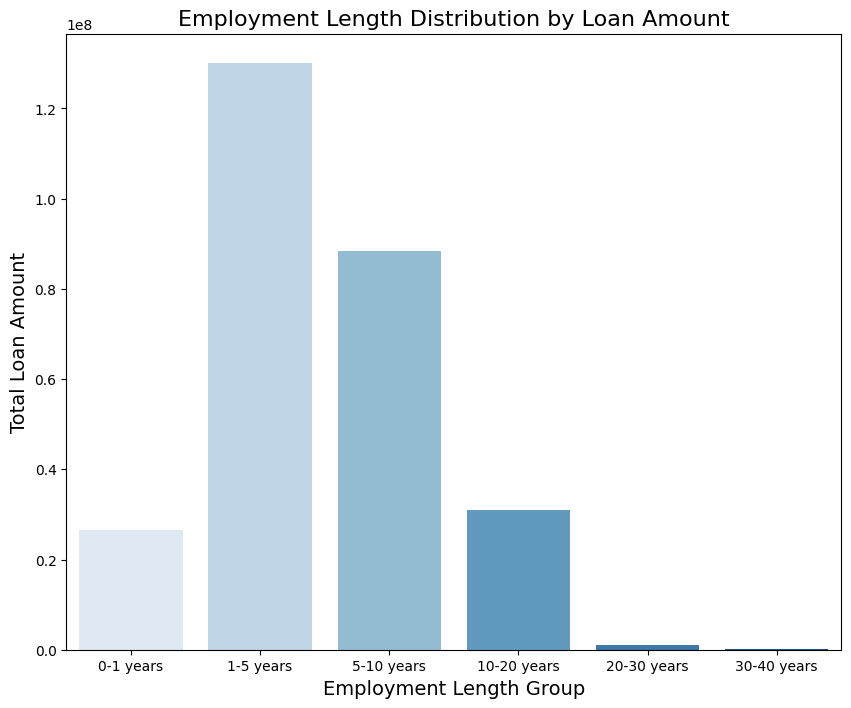

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bin employment length into categories (customizable bins)
employment_bins = [0, 1, 5, 10, 20, 30, 40]  # Adjust based on your data
employment_labels = ['0-1 years', '1-5 years', '5-10 years', '10-20 years', '20-30 years', '30-40 years']

# Create employment length group column
cleaned_data['employment_length_group'] = pd.cut(cleaned_data['person_emp_length'], bins=employment_bins, labels=employment_labels)

# Group by employment length group and sum loan amounts
loan_amount_by_employment_length = cleaned_data.groupby('employment_length_group')['loan_amnt'].sum()

# Create a bar chart for the distribution of loan amounts across employment length groups
plt.figure(figsize=(10, 8))
sns.barplot(x=loan_amount_by_employment_length.index, y=loan_amount_by_employment_length, palette='Blues')

# Add titles and labels
plt.title('Employment Length Distribution by Loan Amount', fontsize=16)
plt.xlabel('Employment Length Group', fontsize=14)
plt.ylabel('Total Loan Amount', fontsize=14)

# Display the chart
plt.show()



In [28]:
def compute_dti(df):
    df['DTI'] = (df['loan_amnt'] / df['person_income']) * 100

def compute_default_rate(df):
    df['Default_Rate'] = (df['loan_status'].sum() / len(df)) * 100

def compute_avg_interest_rate(df):
    df['Average_Interest_Rate'] = df['loan_int_rate'].mean()

def compute_lpi(df):
    df['LPI'] = df['loan_status'] * (1 - df['loan_int_rate']) / df['loan_amnt']

def compute_clv(df, avg_loan_duration):
    df['CLV'] = df['loan_amnt'] * df['loan_int_rate'] * avg_loan_duration

def compute_credit_utilization(df, max_loan_limit):
    df['Credit_Utilization_Rate'] = (df['loan_amnt'] / max_loan_limit) * 100

def compute_loan_loss_rate(df):
    defaulted_loan_amnt = df[df['loan_status'] == 1]['loan_amnt'].sum()
    total_loans_issued = df['loan_amnt'].sum()
    df['Loan_Loss_Rate'] = (defaulted_loan_amnt / total_loans_issued) * 100

def compute_income_to_loan(df):
    df['Income_to_Loan_Ratio'] = df['person_income'] / df['loan_amnt']

# Call functions to compute each KPI
compute_dti(cleaned_data)
compute_default_rate(cleaned_data)
compute_avg_interest_rate(cleaned_data)
compute_lpi(cleaned_data)
avg_loan_duration = cleaned_data['cb_person_cred_hist_length'].mean()  # Example using credit history length as loan duration
max_loan_limit = cleaned_data['loan_amnt'].max()  # Assuming max loan limit is the max loan amount in your dataset
compute_clv(cleaned_data, avg_loan_duration)
compute_credit_utilization(cleaned_data, max_loan_limit)
compute_loan_loss_rate(cleaned_data)
compute_income_to_loan(cleaned_data)


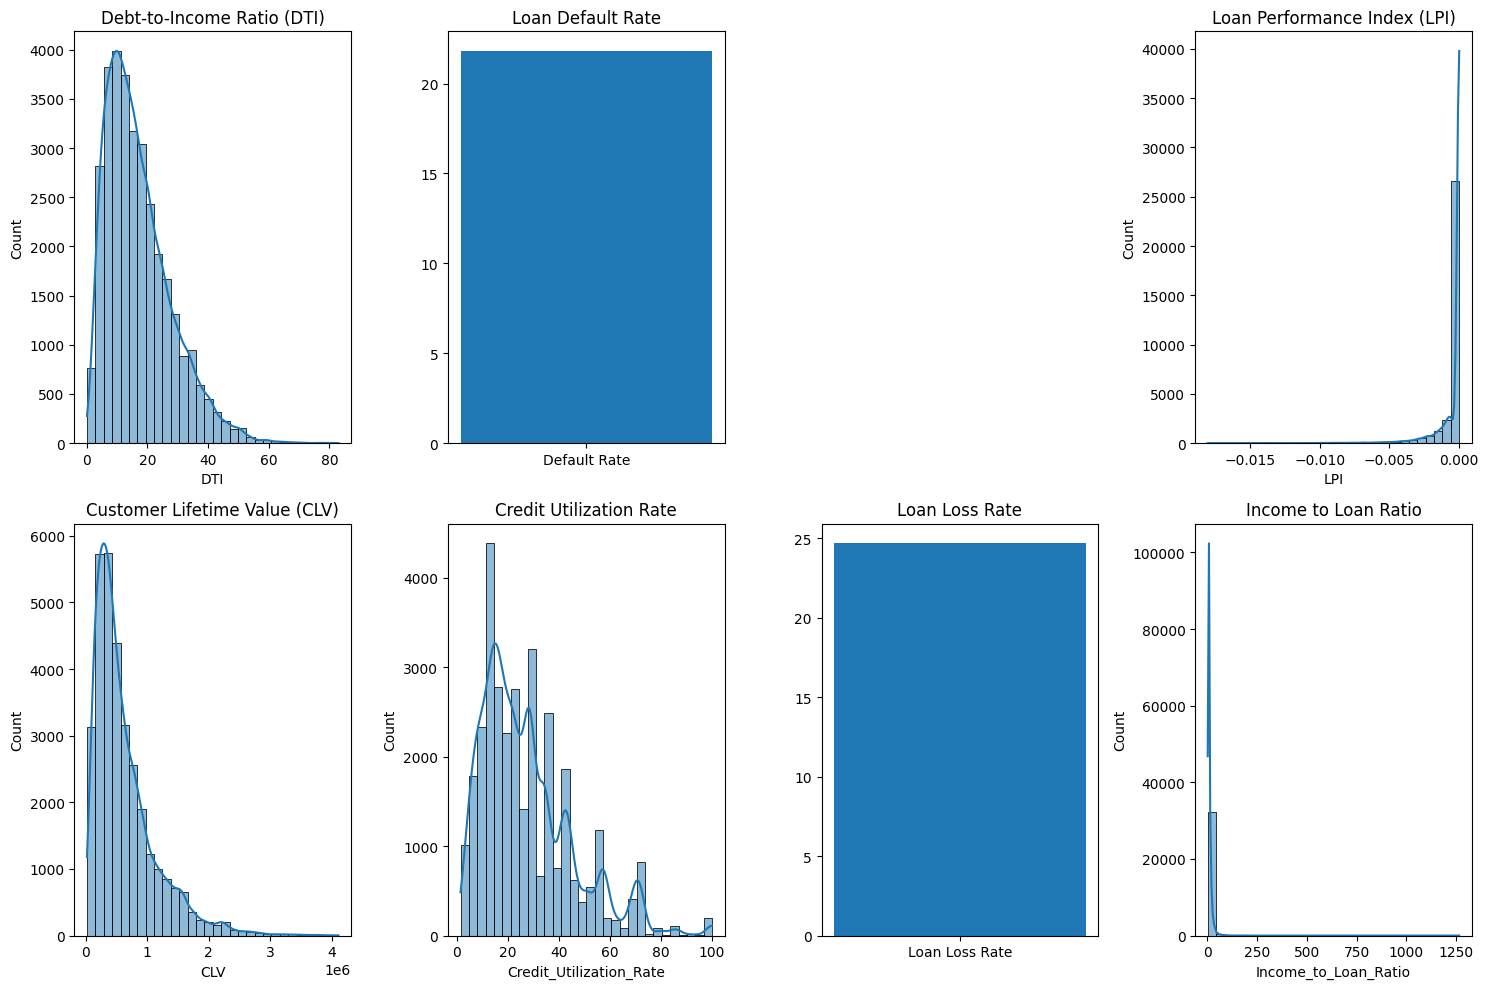

In [29]:
plt.figure(figsize=(15, 10))

# Debt-to-Income Ratio
plt.subplot(2, 4, 1)
sns.histplot(cleaned_data['DTI'], bins=30, kde=True)
plt.title('Debt-to-Income Ratio (DTI)')

# Loan Default Rate
plt.subplot(2, 4, 2)
plt.bar(['Default Rate'], [cleaned_data['Default_Rate'].iloc[0]])
plt.title('Loan Default Rate')

# # Average Loan Interest Rate
# plt.subplot(2, 4, 3)
# plt.bar(['Avg Interest Rate'], [cleaned_data['Average_Interest_Rate'].iloc[0]])
# plt.title('Average Loan Interest Rate')

# Loan Performance Index (LPI)
plt.subplot(2, 4, 4)
sns.histplot(cleaned_data['LPI'], bins=30, kde=True)
plt.title('Loan Performance Index (LPI)')

# Customer Lifetime Value (CLV)
plt.subplot(2, 4, 5)
sns.histplot(cleaned_data['CLV'], bins=30, kde=True)
plt.title('Customer Lifetime Value (CLV)')

# Credit Utilization Rate
plt.subplot(2, 4, 6)
sns.histplot(cleaned_data['Credit_Utilization_Rate'], bins=30, kde=True)
plt.title('Credit Utilization Rate')

# Loan Loss Rate
plt.subplot(2, 4, 7)
plt.bar(['Loan Loss Rate'], [cleaned_data['Loan_Loss_Rate'].iloc[0]])
plt.title('Loan Loss Rate')

# Income to Loan Ratio
plt.subplot(2, 4, 8)
sns.histplot(cleaned_data['Income_to_Loan_Ratio'], bins=30, kde=True)
plt.title('Income to Loan Ratio')

plt.tight_layout()
plt.show()
